# prediction using decision tree algorithm

## Pooja Rathore

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import the data
data = pd.read_csv('iris.csv', index_col=0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
#check the null and missing values 
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

so we can see that there is no null values present in the data

In [11]:
# Summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [12]:
data.shape

(150, 5)

In [14]:
# determine the central tendency of the given data set
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Exploratory data analysis

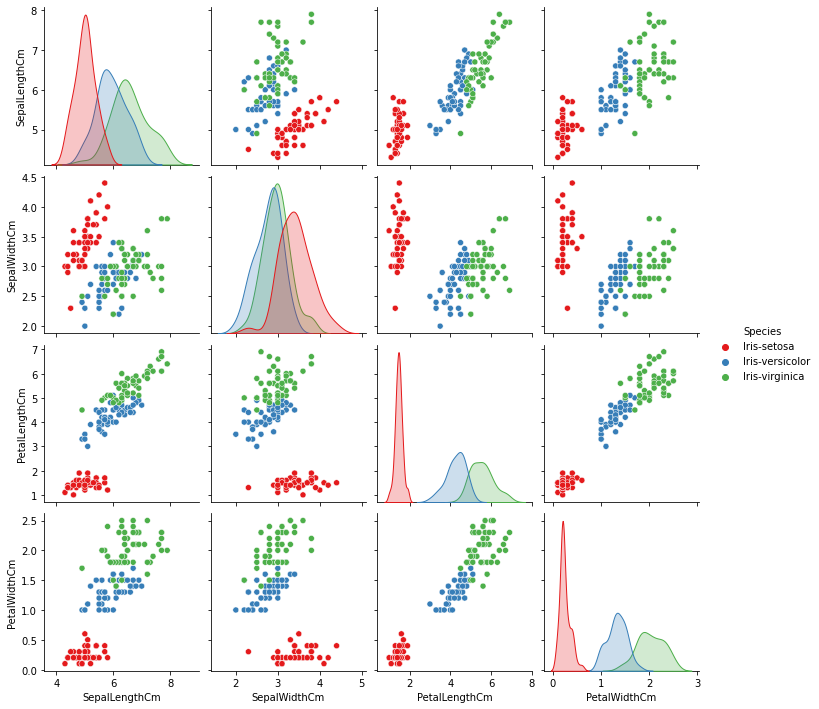

In [15]:
sns.pairplot(data, hue='Species', palette='Set1')

From the above graph we can clearly see that iris setosa is easily differenciate with the other two iris

# Training and testing the data set

In [17]:
from sklearn.model_selection import train_test_split
X = data.drop('Species', axis=1)
Y = data['Species']

In [19]:
X.shape

(150, 4)

In [20]:
Y.shape

(150,)

# split the data into train and test

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [24]:
print('Training dataset shape:', X_train.shape)
print('Testing dataset shape:', X_test.shape)

Testing dataset shape: (45, 4)


# Train the decision tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [26]:
# fit the model
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

# Prediction and Evaluation

In [28]:
prediction = tree.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, prediction)) # classification report will give us insights on how well our algorithm has won

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.86      1.00      0.92        12
 Iris-virginica       1.00      0.89      0.94        18

       accuracy                           0.96        45
      macro avg       0.95      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [32]:
print(confusion_matrix(Y_test, prediction)) # check the accuracy of predicion model

[[15  0  0]
 [ 0 12  0]
 [ 0  2 16]]


In [33]:
# Compare Actual Vs Prediction
compare = pd.DataFrame({'Actual' : Y_test, 'Predicted' : prediction})

In [34]:
compare.head(10)

,Actual,Predicted
Id,,
96,Iris-versicolor,Iris-versicolor
48,Iris-setosa,Iris-setosa
80,Iris-versicolor,Iris-versicolor
37,Iris-setosa,Iris-setosa
102,Iris-virginica,Iris-virginica
59,Iris-versicolor,Iris-versicolor
140,Iris-virginica,Iris-virginica
24,Iris-setosa,Iris-setosa
112,Iris-virginica,Iris-virginica


# Visualise the decision tree

In [35]:
from sklearn.tree import plot_tree

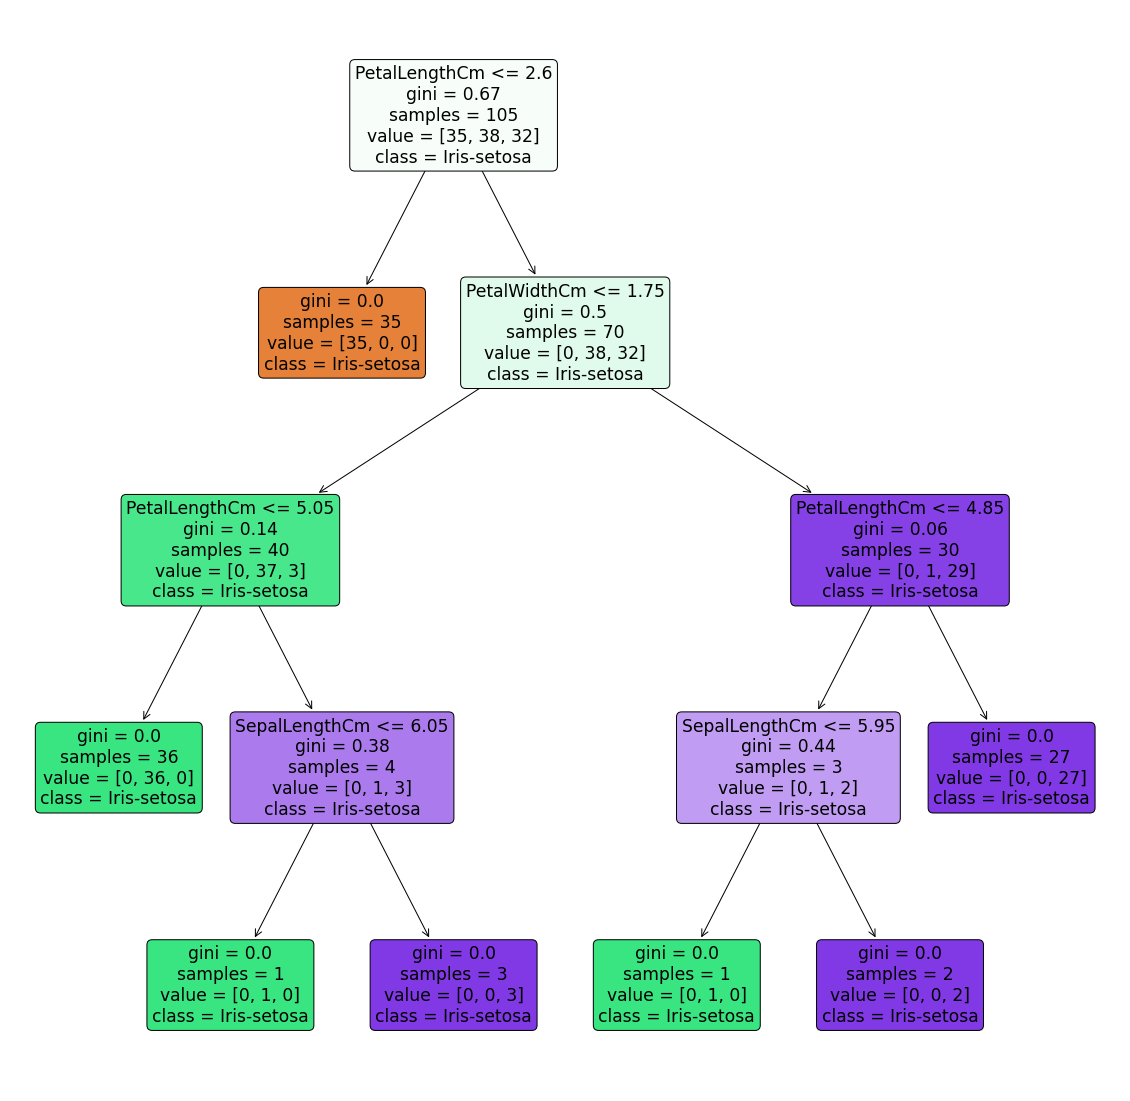

In [39]:
plt.figure(figsize = (20,20))
Decision_tree = plot_tree(tree, feature_names = data.columns, precision=2, rounded=True, filled=True, class_names=Y.values)